In [ ]:
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from fbprophet import Prophet

In [ ]:
df = pd.read_csv('/content/data.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    4999 non-null   object 
 1   cpu_request  4999 non-null   float64
dtypes: float64(1), object(1)
memory usage: 78.2+ KB


In [ ]:
df1 = df.sort_values("timestamp")


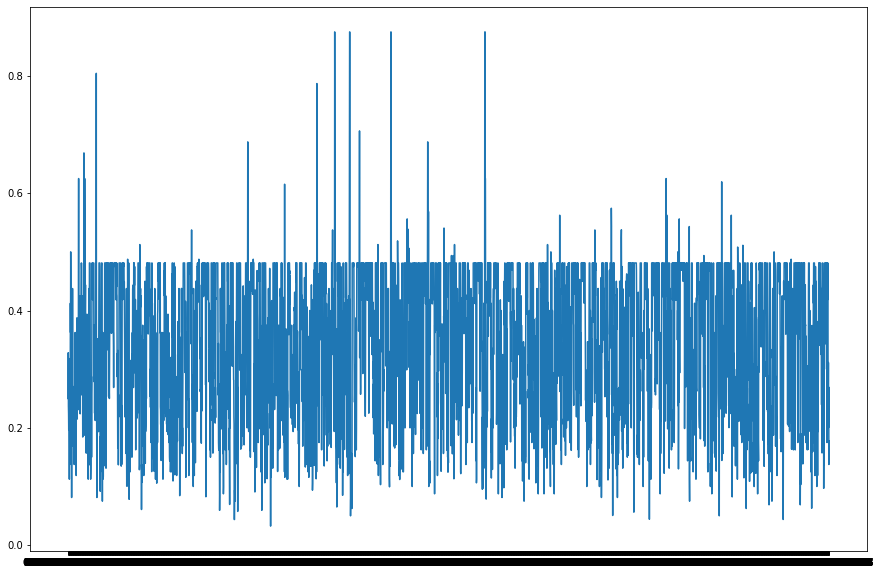

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(df1['timestamp'],df1['cpu_request'])


(array([   0,    1,    2, ..., 4996, 4997, 4998]),
 <a list of 4999 Text major ticklabel objects>)

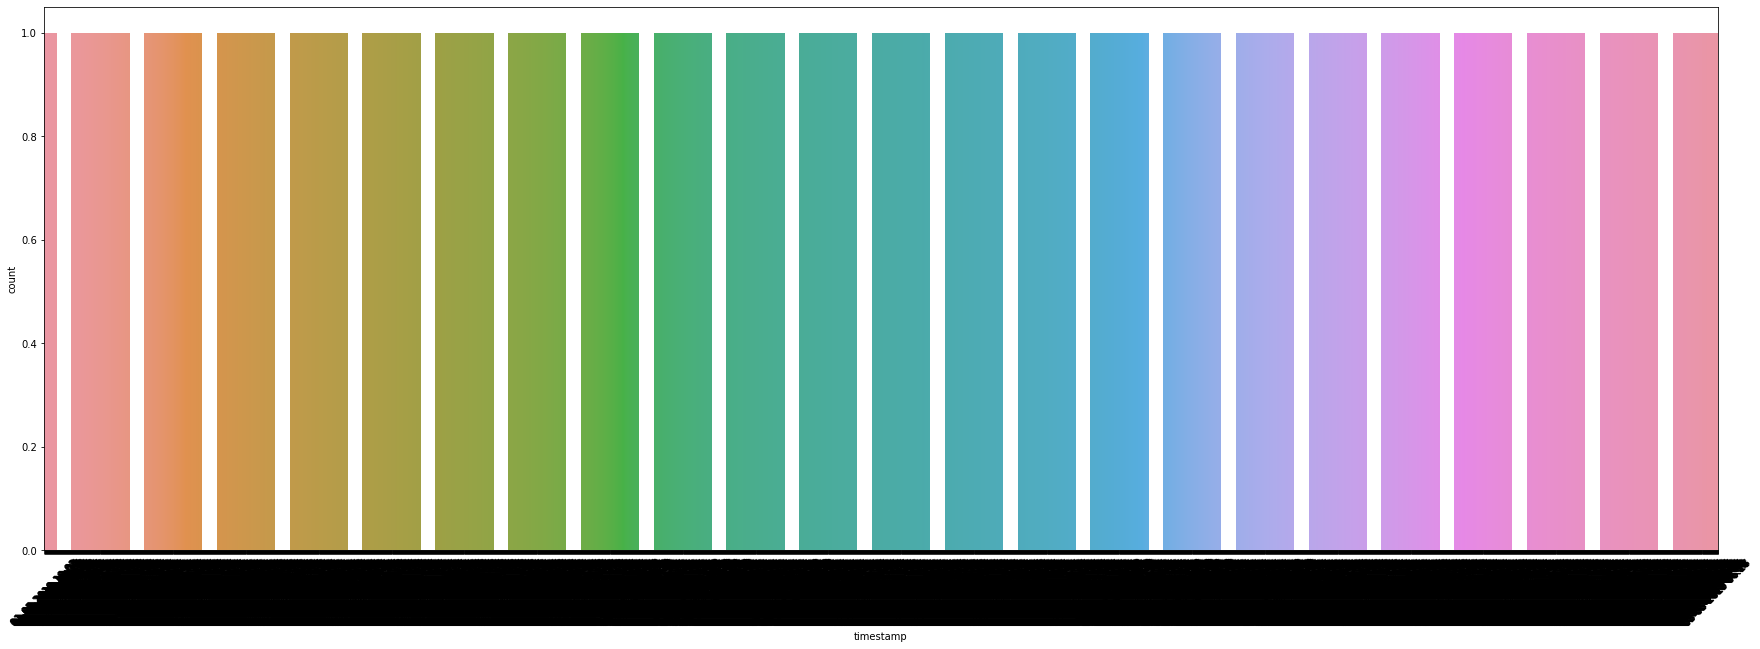

In [ ]:
#region-wise distribution of data
plt.figure(figsize=(30,10))
sns.countplot(x='timestamp',data=df1)
plt.xticks(rotation=45)

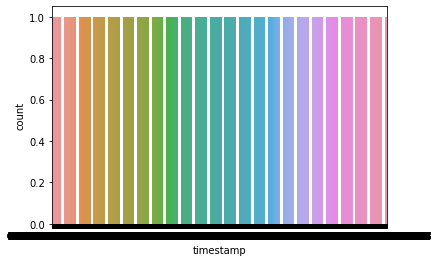

In [ ]:
#year-wise distribution
sns.countplot(x='timestamp',data=df1)

In [ ]:
#only Date & AveragePrice cols are required
df1 = df1[['timestamp','cpu_request']]
df1

,timestamp,cpu_request
0,01-05-2019 19:00,0.250000
1,01-05-2019 19:01,0.328090
2,01-05-2019 19:02,0.237440
3,01-05-2019 19:03,0.224980
4,01-05-2019 19:04,0.196928
...,...,...
4994,05-05-2019 06:14,0.311300
4995,05-05-2019 06:15,0.200626
4996,05-05-2019 06:16,0.269385
4997,05-05-2019 06:17,0.137486


In [ ]:
#rename the cols as ds and y
df1.columns = ['ds','y']
df1.head()

,ds,y
0,01-05-2019 19:00,0.250000
1,01-05-2019 19:01,0.328090
2,01-05-2019 19:02,0.237440
3,01-05-2019 19:03,0.224980
4,01-05-2019 19:04,0.196928


In [ ]:
m = Prophet()
m.fit(df1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [ ]:
#predict about next 1 yr
future = m.make_future_dataframe(periods=365)
#df has dates till 25/3/2018 so 'future' will be till 25/3/2019
forecast = m.predict(future)

In [ ]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5364 entries, 0 to 5363
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ds                          5364 non-null   datetime64[ns]
 1   trend                       5364 non-null   float64       
 2   yhat_lower                  5364 non-null   float64       
 3   yhat_upper                  5364 non-null   float64       
 4   trend_lower                 5364 non-null   float64       
 5   trend_upper                 5364 non-null   float64       
 6   additive_terms              5364 non-null   float64       
 7   additive_terms_lower        5364 non-null   float64       
 8   additive_terms_upper        5364 non-null   float64       
 9   daily                       5364 non-null   float64       
 10  daily_lower                 5364 non-null   float64       
 11  daily_upper                 5364 non-null   float64     

In [ ]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-05 19:00:00,0.274336,0.127360,0.433951,0.274336,0.274336,0.013345,0.013345,0.013345,-0.022925,-0.022925,-0.022925,0.036270,0.036270,0.036270,0.0,0.0,0.0,0.287681
1,2019-01-05 19:01:00,0.274337,0.131142,0.437502,0.274337,0.274337,0.013505,0.013505,0.013505,-0.022866,-0.022866,-0.022866,0.036371,0.036371,0.036371,0.0,0.0,0.0,0.287842
2,2019-01-05 19:02:00,0.274338,0.127149,0.439980,0.274338,0.274338,0.013668,0.013668,0.013668,-0.022805,-0.022805,-0.022805,0.036473,0.036473,0.036473,0.0,0.0,0.0,0.288006
3,2019-01-05 19:03:00,0.274338,0.146255,0.441216,0.274338,0.274338,0.013834,0.013834,0.013834,-0.022741,-0.022741,-0.022741,0.036575,0.036575,0.036575,0.0,0.0,0.0,0.288172
4,2019-01-05 19:04:00,0.274339,0.143138,0.437382,0.274339,0.274339,0.014003,0.014003,0.014003,-0.022673,-0.022673,-0.022673,0.036677,0.036677,0.036677,0.0,0.0,0.0,0.288342


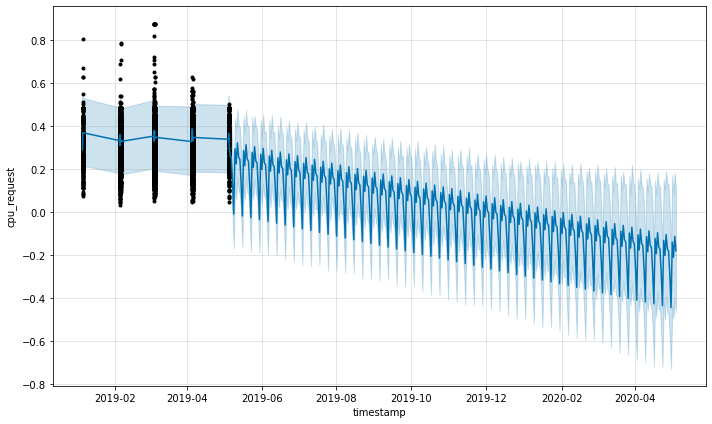

In [ ]:
figure = m.plot(forecast,xlabel='timestamp',ylabel='cpu_request')

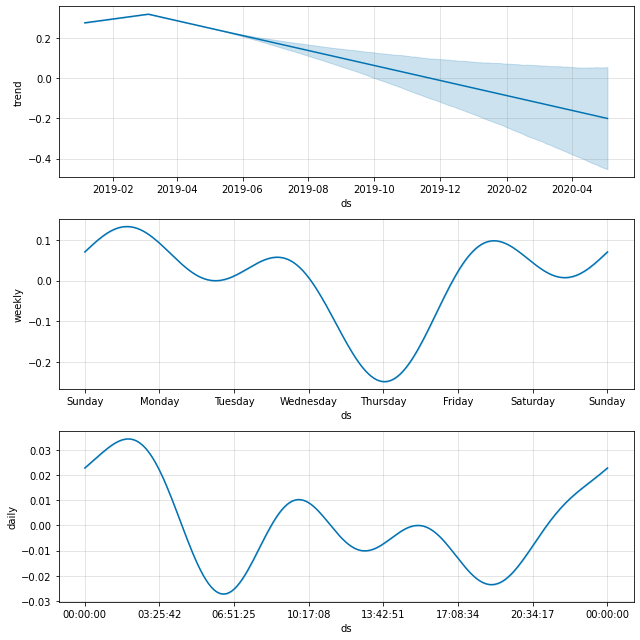

In [ ]:
figure = m.plot_components(forecast)

In [ ]:
#Root mean squared error
from sklearn.metrics import mean_squared_error
from math import sqrt
forecastt=forecast.head(4999)
print(sqrt(mean_squared_error(df['cpu_request'], forecastt['trend'])))

0.13728803616845942


In [ ]:
#mean squared error
print(mean_squared_error(df['cpu_request'], forecastt['trend']))

0.018848004874992223


In [ ]:
#r2 score
from sklearn.metrics import r2_score


r2_score(df['cpu_request'], forecastt['trend'])

-0.22247471230965377

In [ ]:
#mean absolute error
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(df['cpu_request'], forecastt['trend'])
print('Test MAE: %.3f' % mae)

Test MAE: 0.117


In [ ]:
#mean percentage error
mpe_sum = 0
for i,j in zip(df['cpu_request'], forecastt['trend']):
    mpe_sum = mpe_sum + ((i-j)/i)
mpe = (mpe_sum/forecastt['trend'])*100
print('Test MPE')
print(mpe)

Test MPE
0      -26796.971438
1      -26796.921448
2      -26796.871458
3      -26796.821468
4      -26796.771478
            ...     
4994   -30192.851308
4995   -30192.956134
4996   -30193.060961
4997   -30193.165788
4998   -30193.270616
Name: trend, Length: 4999, dtype: float64


In [ ]:
#mean absolute percentage error
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(df['cpu_request'], forecastt['trend'])*100
print(mape)

11.743493632835241


In [ ]:
#Normalized root mean square deviation
from statistics import *
RMSE=sqrt(mean_squared_error(df['cpu_request'], forecastt['trend']))
NRMSE = RMSE/mean (forecastt['trend'])
print(NRMSE)

0.4694773334656866
